# Exercise: Go through the analysis of VBF production in HWW decay

## Step1: Understand the selection cuts, SRs and CRs

paper: https://cds.cern.ch/record/2752167/files/ATL-COM-PHYS-2021-042.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Use the following command when you first install uproot
# !pip3 install uproot
import uproot

## 1. Load MC data

Please download the root files from: https://cernbox.cern.ch/index.php/s/BAARS9LbnIz6WN1

#### data format

There are 5 root files in total, one for "VBF", "ggF", "Top", "WW", and "Zjets" processes respectively.

In each root file, there's a tree called "observables".

Inside the tree, there are several branches for storing the variables.

rootfile <br>
&emsp;| <br>
&emsp;--(tree) observables <br>
&emsp;&emsp;  | <br>
&emsp;&emsp;   -- (branch) Njets <br>
&emsp;&emsp;  | <br>
&emsp;&emsp;   -- (branch) MT <br>
&emsp;&emsp;  . <br>
&emsp;&emsp;  . <br>
&emsp;&emsp;  .


#### naming of some observables

1. mcChannelNumber: ID of a MC sample
2. event_number: ID of an event
3. MT: transverse momentum of the Higgs boson
4. MET: missing transverse momentum
5. N_bjets: number of b-tagging jets
6. OLV: outside-lepton-veto
7. centralJetVetoLeadpT: central-jet-veto
  
  
#### load data 

Use "uproot" to read the root files (instructions can be found here: https://github.com/scikit-hep/uproot3). 

Often used commands:

1.
file = uproot.open("path/to/your/rootfile")

2.
file.keys()
: get name of the Tree

3.
file['tree_name'].keys()
: get name of the branches

In [2]:
# input folder
filepath_prefix = "samples/ntuples-VBF-ANA-mc1516-"

# collect data of each process
processes = ['ggF', 'VBF', 'top', 'WW', 'Zjets']
columns = ['weight', 'mcChannelNumber', 'event_number', 'MT', 'Mll', 'Mjj', 'N_bjets', 'm_tautau', 'mZ', 'OLV', 'centralJetVetoLeadpT', 'lep0_flavour', 'lep1_flavour', 'dilepton_charge']

Data = []
for i in range(len(processes)):
    file = uproot.open(filepath_prefix + processes[i] + ".root")
    df = file['observables'].arrays(columns, library="pd")
    df['process'] = [processes[i] for evt in range(len(df))] # add a column to label each event
    Data.append(df)

Data = pd.concat(Data, ignore_index=True)

## 2. Check data format & initial number of events

In [3]:
print("shape of data: ", Data.shape)
print(min(Data['OLV']),max(Data['OLV']))
print(min(Data['mZ']),max(Data['mZ']))
print(len(Data[Data['centralJetVetoLeadpT']==-5]))
Data.head(20)

shape of data:  (7144939, 15)
0 1
91.1876 91.1876
4951873


weight  mcChannelNumber  event_number          MT        Mll  \
0   0.008009           345324       1224903   40.780988  25.884178   
1   0.009430           345324       1223103  112.637144  72.070710   
2   0.006973           345324       1223981  136.488073  59.099208   
3   0.007078           345324       1223879  131.156524  63.618537   
4   0.006489           345324       1224838  115.620531  43.838981   
5   0.008001           345324       1224107  107.541775  61.635115   
6   0.005811           345324       1223753   71.891883  38.807895   
7   0.007730           345324       1224144  137.946145  59.646088   
8   0.006845           345324       1223050   35.039853  18.852316   
9   0.010073           345324       1223450  102.010224  73.790526   
10  0.008455           345324       1224245   59.850421  39.085926   
11  0.006801           345324       1223526  142.921923  53.692940   
12  0.006765           345324       1223380  118.717580  27.976972   
13  0.006062           345324       1224671   92.659286  44.362669   
14  0.007437           345324       1224621   41.451283  29.614457   
15  0.007774           345324       1223684  119.151262  57.541537   
16  0.006838           345324       1224202   70.009218  45.237042   
17  0.009240           345324       1223786   84.255108  56.992386   
18  0.007221           345324       1224995   98.970547  64.306395   
19  0.007369           345324       1223113  132.836181  67.581069   

            Mjj  N_bjets    m_tautau       mZ  OLV  centralJetVetoLeadpT  \
0     66.009590        0   58.075655  91.1876    0             -5.000000   
1     59.902029        0   -0.009000  91.1876    0             -5.000000   
2    149.271074        0   -0.009000  91.1876    0             -5.000000   
3     49.610227        1   -0.009000  91.1876    0             -5.000000   
4    352.336982        0   -0.009000  91.1876    0             -5.000000   
5     89.880354        0  104.785970  91.1876    0             -5.000000   
6    809.629476        0  150.066657  91.1876    1          27688.113281   
7    455.715294        0   -0.009000  91.1876    1             -5.000000   
8     42.403888        0   -0.009000  91.1876    0             -5.000000   
9    149.341484        0   -0.009000  91.1876    0             -5.000000   
10   197.378469        0   64.836573  91.1876    1          30198.601562   
11    28.162433        0   -0.009000  91.1876    0             -5.000000   
12   247.918550        1   -0.009000  91.1876    0             -5.000000   
13   149.579340        0  221.475274  91.1876    0             -5.000000   
14   484.565268        0   49.031933  91.1876    1             -5.000000   
15   256.481357        0   85.663650  91.1876    1             -5.000000   
16   443.565824        1   82.357414  91.1876    0          27064.275391   
17    53.953457        0   24.901981  91.1876    1             -5.000000   
18   113.373752        0   80.155401  91.1876    0          20710.746094   
19  1336.269576        0  664.281457  91.1876    1             -5.000000   

    lep0_flavour  lep1_flavour  dilepton_charge process  
0              8             6              0.0     ggF  
1              6             8              0.0     ggF  
2              6             8              0.0     ggF  
3              6             8              0.0     ggF  
4              6             8              0.0     ggF  
5              6             8              0.0     ggF  
6              6             8              0.0     ggF  
7              6             8              0.0     ggF  
8              6             8              0.0     ggF  
9              8             6              0.0     ggF  
10             8             6              0.0     ggF  
11             8             6              0.0     ggF  
12             6             8              0.0     ggF  
13             8             6              0.0     ggF  
14             6             8              0.0     ggF  
15        

In [4]:
Data[]

SyntaxError: invalid syntax (<ipython-input-4-767bb1e5b09a>, line 1)

In [8]:
for process in processes:
    print("number of raw {} events is: {}".format(process, len(Data[Data['process']==process])))
    
print("")

for process in processes:
    print("number of weighted {} events is: {}".format(process, np.sum(Data[Data['process']==process]['weight'])))


number of raw ggF events is: 35130
number of raw VBF events is: 129217
number of raw top events is: 6210290
number of raw WW events is: 467803
number of raw Zjets events is: 302499

number of weighted ggF events is: 265.83345069600085
number of weighted VBF events is: 98.09646283256971
number of weighted top events is: 243439.04610987267
number of weighted WW events is: 6019.283289156737
number of weighted Zjets events is: 6427.718156278447


## 3. Apply selection cuts to build the signal region (SR) & control regions (CRs)

selections applied are summarized in Table 2, 3 in the paper. Descriptions can be found through Sec. 5-6. 

note: Pre-selections and Njets=2 cut have been included in the sample. 

### Task:
For each cut to define the SR and CRs:
1. Plot the distribution of the observable before apply the cut on it.
2. Filter the events by the cut.
3. Record the number of events and fraction of each process after the cut.
4. Compare with the plot before the cut, think about why this cut is applyed.

In [9]:
######################################
# plotting function
# note: Remember to apply event weight
######################################

def plotting(obs, inputData, bins, range_min, range_max):
    color = ["red", "orange", "yellow", "purple", "green"]
    
    fig, ax = plt.subplots(1,2,figsize=(9,12))

    plt.subplot(211)
    for i in range(len(processes)):
        plt.hist(inputData[inputData['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=False, weights=inputData[inputData['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.xlim(range_min, range_max)
    plt.title(obs, fontsize=20)

    plt.subplot(212)
    for i in range(len(processes)):
        plt.hist(inputData[inputData['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=True, weights=inputData[inputData['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.title(obs+"(normalized)", fontsize=20)
    plt.xlim(range_min, range_max)
    
    plt.show()

In [10]:
def plotting_with_cut(obs, inputData, cut_data, bins, range_min, range_max):
    color = ["red", "orange", "yellow", "purple", "green"]
    
    fig, ax = plt.subplots(2,2,figsize=(18,12))

    plt.subplot(221)
    for i in range(len(processes)):
        plt.hist(inputData[inputData['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=False, weights=inputData[inputData['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.xlim(range_min, range_max)
    plt.title(obs, fontsize=20)

    plt.subplot(222)
    for i in range(len(processes)):
        plt.hist(inputData[inputData['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=True, weights=inputData[inputData['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.title(obs+"(normalized)", fontsize=20)
    plt.xlim(range_min, range_max)
    
    plt.subplot(223)
    for i in range(len(processes)):
        plt.hist(cut_data[cut_data['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=False, weights=cut_data[cut_data['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.xlim(range_min, range_max)
    plt.title(obs + " after cut", fontsize=20)

    plt.subplot(224)
    for i in range(len(processes)):
        plt.hist(cut_data[cut_data['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=True, weights=cut_data[cut_data['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.title(obs+" (normalized, after cut)", fontsize=20)
    plt.xlim(range_min, range_max)
    
    plt.show()

In [11]:
def plotting_with_cut_log(obs, inputData, cut_data, bins, range_min, range_max):
    color = ["red", "orange", "yellow", "purple", "green"]
    
    fig, ax = plt.subplots(2,2,figsize=(18,12))

    plt.subplot(221)
    for i in range(len(processes)):
        plt.hist(inputData[inputData['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=False, weights=inputData[inputData['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.xlim(range_min, range_max)
    plt.ylim(0)

    plt.title(obs, fontsize=20)
    plt.xscale('log')

    plt.subplot(222)
    for i in range(len(processes)):
        plt.hist(inputData[inputData['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=True, weights=inputData[inputData['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.title(obs+"(normalized)", fontsize=20)
    plt.xlim(range_min, range_max)
    plt.ylim(0)

    plt.xscale('log')

    
    plt.subplot(223)
    for i in range(len(processes)):
        plt.hist(cut_data[cut_data['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=False, weights=cut_data[cut_data['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.xlim(range_min, range_max)
    plt.ylim(0)
    plt.title(obs + " after cut", fontsize=20)
    plt.xscale('log')

        
    plt.subplot(224)
    for i in range(len(processes)):
        plt.hist(cut_data[cut_data['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=True, weights=cut_data[cut_data['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.title(obs+" (normalized, after cut)", fontsize=20)
    plt.xlim(range_min, range_max)
    plt.ylim(0)

    plt.xscale('log')
    
    plt.show()


In [12]:
def plotrange(inputData, obs):
    return (min(inputData[obs]), max(inputData[obs]))

In [13]:
def plotting_SR_CR(obs, inputData, cut_data, bins, range_min, range_max):
    color = ["red", "orange", "yellow", "purple", "green"]
    
    fig, ax = plt.subplots(2,2,figsize=(18,12))

    plt.subplot(221)
    for i in range(len(processes)):
        plt.hist(inputData[inputData['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=False, weights=inputData[inputData['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.xlim(range_min, range_max)
    plt.ylim(0)
    plt.title(obs+ " Signal Region", fontsize=20)
    plt.xscale('log')

    plt.subplot(222)
    for i in range(len(processes)):
        plt.hist(inputData[inputData['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=True, weights=inputData[inputData['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.title(obs+"(normalized, Signal Region)", fontsize=20)
    plt.xlim(range_min, range_max)
    plt.ylim(0)

    plt.xscale('log')

    
    plt.subplot(223)
    for i in range(len(processes)):
        plt.hist(cut_data[cut_data['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=False, weights=cut_data[cut_data['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.xlim(range_min, range_max)
    plt.ylim(0)
    plt.title(obs + " Control Region", fontsize=20)
    plt.xscale('log')

        
    plt.subplot(224)
    for i in range(len(processes)):
        plt.hist(cut_data[cut_data['process']==processes[i]][obs], bins, stacked=False, histtype='step', color=color[i], linewidth = 2, density=True, weights=cut_data[cut_data['process']==processes[i]]['weight'], label=processes[i])
    plt.legend(loc="upper right", prop={'size':12})
    plt.title(obs+" (normalized, Control Region)", fontsize=20)
    plt.xlim(range_min, range_max)
    plt.ylim(0)

    plt.xscale('log')
    
    plt.show()

### 3.1 Event Selection to Define Signal Region
#### 3.1.1 Background Rejection $N_{\text{b-jet},(p_T > 20 \text{ GeV})}=0$

In [15]:
#########
# example
#########

#1. Plot the distribution of the observable for a cut
#plotting('N_bjets', Data, [0,1,2,3], 0, 3)

#2. Apply cut
data_after_bjetVeto = Data[Data['N_bjets']==0]
#3. print number of events (after cut)
for process in processes:
    print("number of weighted {} events is: {}".format(process, np.sum(data_after_bjetVeto[data_after_bjetVeto['process']==process]['weight'])))
    
print("")

#4. print fraction of each process
total_nevents = np.sum(data_after_bjetVeto['weight'])

for process in processes:
    print("fraction of {} is: {:.4f}".format(process, np.sum(data_after_bjetVeto[data_after_bjetVeto['process']==process]['weight'])/total_nevents))


plotting_with_cut('N_bjets',Data, data_after_bjetVeto, np.linspace(0,4,4), 0, 4)

number of weighted ggF events is: 230.60166242750364
number of weighted VBF events is: 87.29802359554041
number of weighted top events is: 16403.827570370642
number of weighted WW events is: 5240.241789549655
number of weighted Zjets events is: 5371.526982721019

fraction of ggF is: 0.0084
fraction of VBF is: 0.0032
fraction of top is: 0.6001
fraction of WW is: 0.1917
fraction of Zjets is: 0.1965


#### 3.1.2 Background Rejection $m_{\tau\tau}<m_Z-25 \text{ GeV}$

In [16]:
data_after_taumass = Data[(Data['m_tautau']) < (Data['mZ']-25)]
print(min(Data['m_tautau']),max(Data["m_tautau"]))
print(min(data_after_taumass['m_tautau']),max(data_after_taumass['m_tautau']))
plotting_with_cut('m_tautau', Data, data_after_taumass, np.linspace(0,200,20), 0, 200)
for process in processes:
    print("number of weighted {} events is: {}".format(process, np.sum(data_after_taumass[data_after_taumass['process']==process]['weight'])))
    
print("")

#4. print fraction of each process
total_nevents = np.sum(data_after_taumass['weight'])

for process in processes:
    print("fraction of {} is: {:.4f}".format(process, np.sum(data_after_taumass[data_after_taumass['process']==process]['weight'])/total_nevents))

plotting_with_cut('m_tautau', Data, data_after_taumass, np.linspace(200,400,20), 200, 400)


-0.009 336555582.43800837
-0.009 66.1875619304997


number of weighted ggF events is: 231.70722512208857
number of weighted VBF events is: 84.22687127087661
number of weighted top events is: 150403.9383672594
number of weighted WW events is: 3463.9205526301557
number of weighted Zjets events is: 2178.1829162508166

fraction of ggF is: 0.0015
fraction of VBF is: 0.0005
fraction of top is: 0.9619
fraction of WW is: 0.0222
fraction of Zjets is: 0.0139


C:\Users\XiangYuan\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\XiangYuan\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\XiangYuan\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\XiangYuan\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\XiangYuan\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


#### 3.1.3 $H\rightarrow WW^* \rightarrow e\nu \mu \nu$ topology

In [33]:
data_after_OLV_Mjj_CJV = Data[(Data['OLV']==1) & (Data['Mjj']>120)]
print(min(Data['Mjj']),max(Data['Mjj']))
print(min(data_after_OLV_Mjj_CJV['Mjj']),max(data_after_OLV_Mjj_CJV['Mjj']))
for process in processes:
    print("number of weighted {} events is: {}".format(process, np.sum(data_after_OLV_Mjj_CJV[data_after_OLV_Mjj_CJV['process']==process]['weight'])))
    
print("")

#4. print fraction of each process
total_nevents = np.sum(data_after_OLV_Mjj_CJV['weight'])

for process in processes:
    print("fraction of {} is: {:.4f}".format(process, np.sum(data_after_OLV_Mjj_CJV[data_after_OLV_Mjj_CJV['process']==process]['weight'])/total_nevents))

plotting_with_cut_log('Mjj', Data, data_after_OLV_Mjj_CJV, 20, 10, 10000)

13.145395261202388 9682.86711305735
120.00004501042463 9682.86711305735
number of weighted ggF events is: 77.79851115644257
number of weighted VBF events is: 77.36139526355527
number of weighted top events is: 51480.84162776742
number of weighted WW events is: 1196.7903905362712
number of weighted Zjets events is: 1479.944684024069

fraction of ggF is: 0.0014
fraction of VBF is: 0.0014
fraction of top is: 0.9479
fraction of WW is: 0.0220
fraction of Zjets is: 0.0272


### 3.2 Event Selection to Define Control Region
#### 3.2.1 $t\bar t/Wt$ Background

In [21]:
CR_top_data_after_bjet = Data[Data['N_bjets']==1]
CR_top_data_after_ditau = Data[Data['m_tautau'] < Data['mZ']-25]
CR_top_data_after_CJV_OLV = Data[(Data['OLV']==1) & \
                                 (Data['centralJetVetoLeadpT']<30000)]
print(plotrange(CR_top_data_after_bjet,'N_bjets'))
print(plotrange(CR_top_data_after_ditau,'m_tautau'))
print(plotrange(CR_top_data_after_CJV_OLV, 'Mjj'))

(1, 1)
(-0.009, 66.1875619304997)
(17.17547487059718, 7571.130418896657)


number of weighted ggF events is: 30.997805903834497
number of weighted VBF events is: 10.087102395526383
number of weighted top events is: 92714.4775053195
number of weighted WW events is: 711.9798378858989
number of weighted Zjets events is: 909.5552390535545

fraction of ggF is: 0.0003
fraction of VBF is: 0.0001
fraction of top is: 0.9824
fraction of WW is: 0.0075
fraction of Zjets is: 0.0096


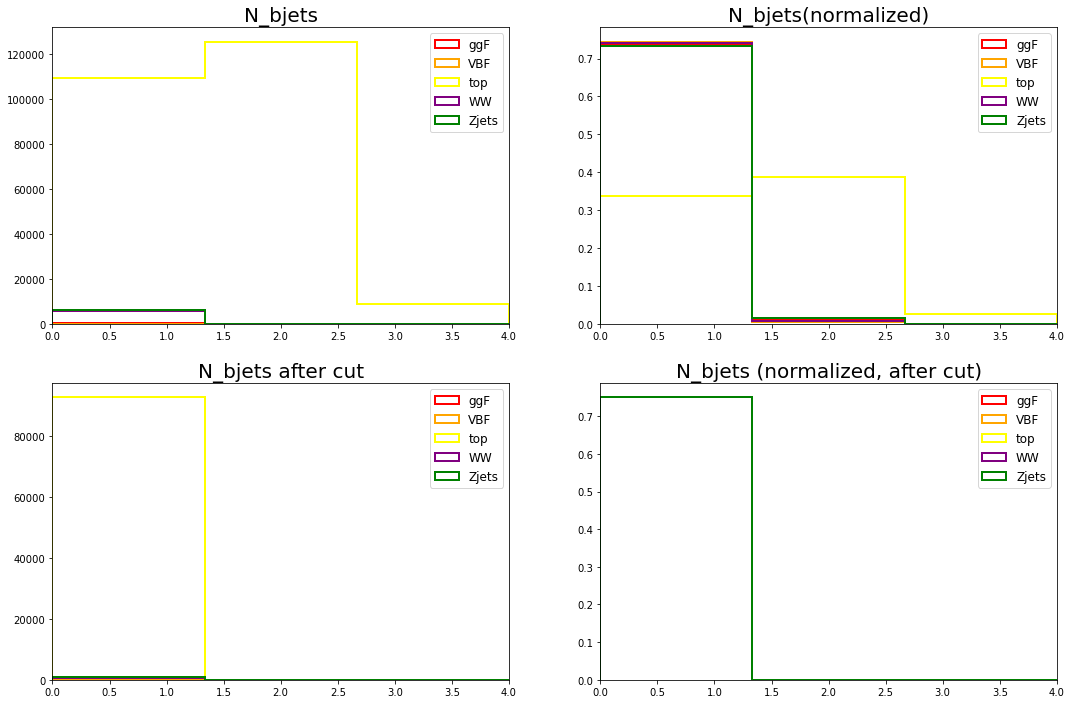

In [22]:
for process in processes:
    print("number of weighted {} events is: {}".format(process, np.sum(CR_top_data_after_bjet[CR_top_data_after_bjet['process']==process]['weight'])))
    
print("")

#4. print fraction of each process
total_nevents = np.sum(CR_top_data_after_bjet['weight'])

for process in processes:
    print("fraction of {} is: {:.4f}".format(process, np.sum(CR_top_data_after_bjet[CR_top_data_after_bjet['process']==process]['weight'])/total_nevents))
plotting_with_cut('N_bjets', Data, CR_top_data_after_bjet,np.linspace(0,4,4), 0, 4)

number of weighted ggF events is: 231.70722512208857
number of weighted VBF events is: 84.22687127087661
number of weighted top events is: 150403.9383672594
number of weighted WW events is: 3463.9205526301557
number of weighted Zjets events is: 2178.1829162508166

fraction of ggF is: 0.0015
fraction of VBF is: 0.0005
fraction of top is: 0.9619
fraction of WW is: 0.0222
fraction of Zjets is: 0.0139


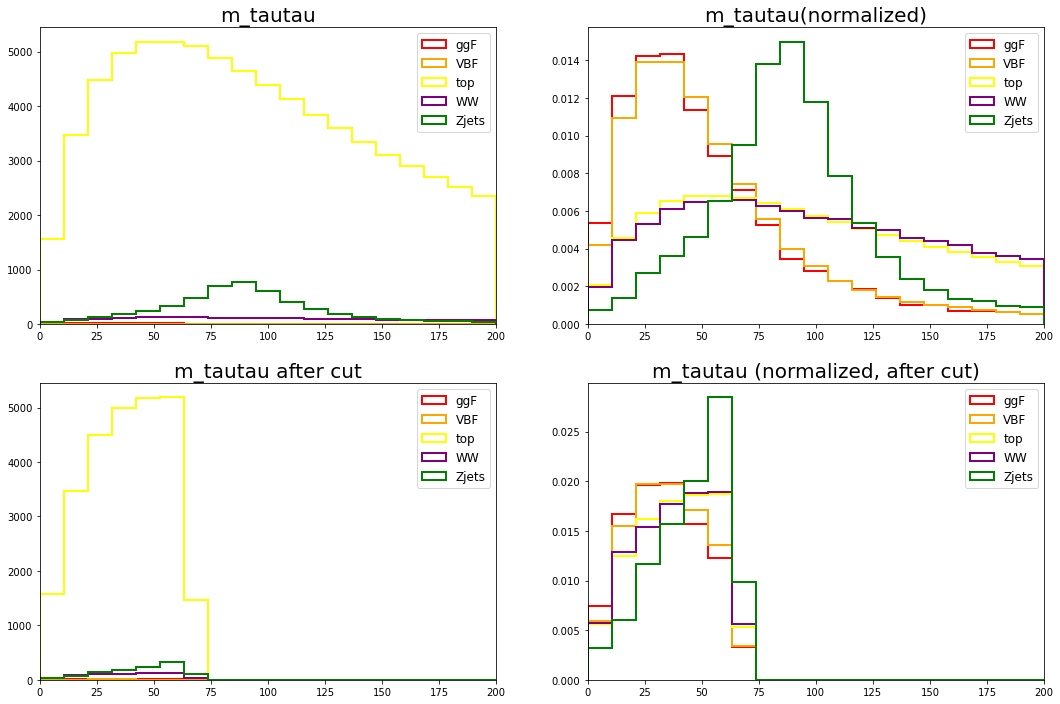

In [23]:
for process in processes:
    print("number of weighted {} events is: {}".format(process, np.sum(CR_top_data_after_ditau[CR_top_data_after_ditau['process']==process]['weight'])))
    
print("")

#4. print fraction of each process
total_nevents = np.sum(CR_top_data_after_ditau['weight'])

for process in processes:
    print("fraction of {} is: {:.4f}".format(process, np.sum(CR_top_data_after_ditau[CR_top_data_after_ditau['process']==process]['weight'])/total_nevents))
plotting_with_cut('m_tautau', Data, CR_top_data_after_ditau,np.linspace(0,200,20), 0, 200)

number of weighted ggF events is: 72.19474234252398
number of weighted VBF events is: 72.48289191178377
number of weighted top events is: 38849.52626980741
number of weighted WW events is: 1029.75364749981
number of weighted Zjets events is: 1393.2893580679722

fraction of ggF is: 0.0017
fraction of VBF is: 0.0018
fraction of top is: 0.9380
fraction of WW is: 0.0249
fraction of Zjets is: 0.0336


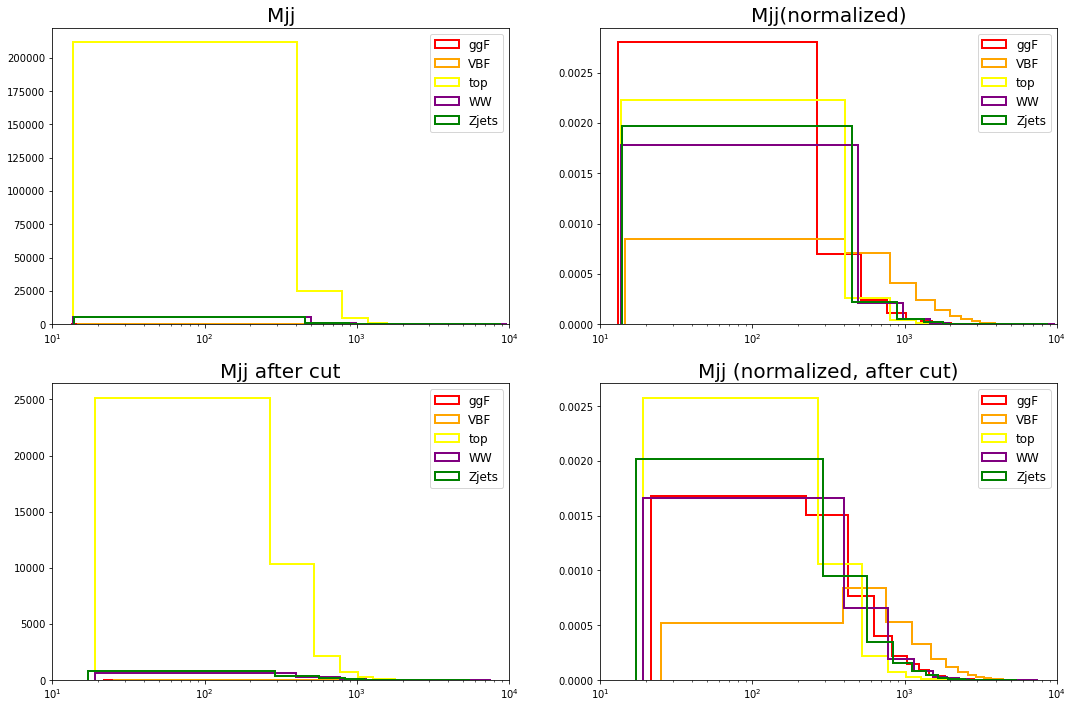

In [24]:
for process in processes:
    print("number of weighted {} events is: {}".format(process, np.sum(CR_top_data_after_CJV_OLV[CR_top_data_after_CJV_OLV['process']==process]['weight'])))
    
print("")

#4. print fraction of each process
total_nevents = np.sum(CR_top_data_after_CJV_OLV['weight'])

for process in processes:
    print("fraction of {} is: {:.4f}".format(process, np.sum(CR_top_data_after_CJV_OLV[CR_top_data_after_CJV_OLV['process']==process]['weight'])/total_nevents))
plotting_with_cut_log('Mjj', Data, CR_top_data_after_CJV_OLV, 20, 10, 10000)

#### 3.2.2 $Z/\gamma^*$ Background

In [25]:
CR_Z_data_after_bjet = Data[Data['N_bjets']==0]
CR_Z_data_after_mll_ditau_CJV_OLV = Data[(Data['Mll']< 70) & \
                                         (Data['m_tautau']-Data['mZ']<25) & (Data['m_tautau']-Data['mZ']> -25) & (Data['OLV']==1) & \
                                         (Data['centralJetVetoLeadpT']<30000)]
print(plotrange(CR_Z_data_after_bjet,'N_bjets'))
print(plotrange(CR_Z_data_after_mll_ditau_CJV_OLV, 'Mjj'))

(0, 0)
(17.17547487059718, 7363.844147349048)


In [26]:
for process in processes:
    print("number of weighted {} events is: {}".format(process, np.sum(CR_Z_data_after_bjet[CR_Z_data_after_bjet['process']==process]['weight'])))
    
print("")

#4. print fraction of each process
total_nevents = np.sum(CR_Z_data_after_bjet['weight'])

for process in processes:
    print("fraction of {} is: {:.4f}".format(process, np.sum(CR_Z_data_after_bjet[CR_Z_data_after_bjet['process']==process]['weight'])/total_nevents))
plotting_with_cut('N_bjets', Data, CR_Z_data_after_bjet,np.linspace(0,4,4), 0, 4)

number of weighted ggF events is: 230.60166242750364
number of weighted VBF events is: 87.29802359554041
number of weighted top events is: 16403.827570370642
number of weighted WW events is: 5240.241789549655
number of weighted Zjets events is: 5371.526982721019

fraction of ggF is: 0.0084
fraction of VBF is: 0.0032
fraction of top is: 0.6001
fraction of WW is: 0.1917
fraction of Zjets is: 0.1965


number of weighted ggF events is: 4.158654706463918
number of weighted VBF events is: 5.207525318085805
number of weighted top events is: 889.240307496354
number of weighted WW events is: 25.298082185660157
number of weighted Zjets events is: 534.5076647668459

fraction of ggF is: 0.0029
fraction of VBF is: 0.0036
fraction of top is: 0.6097
fraction of WW is: 0.0173
fraction of Zjets is: 0.3665


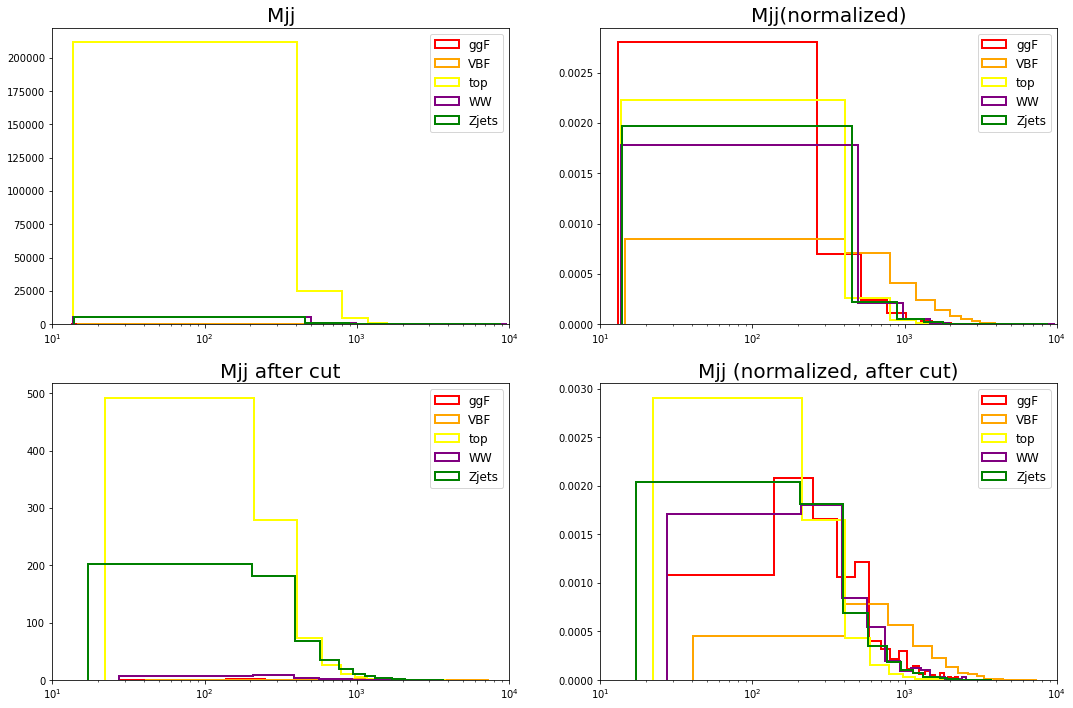

In [27]:
for process in processes:
    print("number of weighted {} events is: {}".format(process, np.sum(CR_Z_data_after_mll_ditau_CJV_OLV[CR_Z_data_after_mll_ditau_CJV_OLV['process']==process]['weight'])))
    
print("")

#4. print fraction of each process
total_nevents = np.sum(CR_Z_data_after_mll_ditau_CJV_OLV['weight'])

for process in processes:
    print("fraction of {} is: {:.4f}".format(process, np.sum(CR_Z_data_after_mll_ditau_CJV_OLV[CR_Z_data_after_mll_ditau_CJV_OLV['process']==process]['weight'])/total_nevents))
plotting_with_cut_log('Mjj', Data, CR_Z_data_after_mll_ditau_CJV_OLV, 20, 10, 10000)

### 5. Check the MT distribution in SR and CRs

In [28]:
SR_data = Data[(Data['OLV']==1) & (Data['centralJetVetoLeadpT']>0) & (Data['centralJetVetoLeadpT']<30000) & (Data['Mjj']>120) & (Data['m_tautau'] < Data['mZ']-25) & (Data['N_bjets']==0)]
CR_data = Data[((Data['OLV']==1) & (Data['centralJetVetoLeadpT']<30000) &\
                (Data['m_tautau'] < Data['mZ']-25) &\
                (Data['N_bjets']==1))|\
               ((Data['N_bjets']==0) &\
                (Data['Mll']< 70) & \
                (Data['m_tautau']-Data['mZ']<25) & (Data['m_tautau']-Data['mZ']> -25) & (Data['OLV']==1) & (Data['centralJetVetoLeadpT']<30000))]
print(plotrange(SR_data, 'MT'))
print(plotrange(CR_data, 'MT'))

(13.21197767794845, 1714.2310435840207)
(11.526999561003484, 1588.0642938081576)


In [29]:
plotting_with_cut_log('MT', Data, SR_data, 100, 10, 2000)

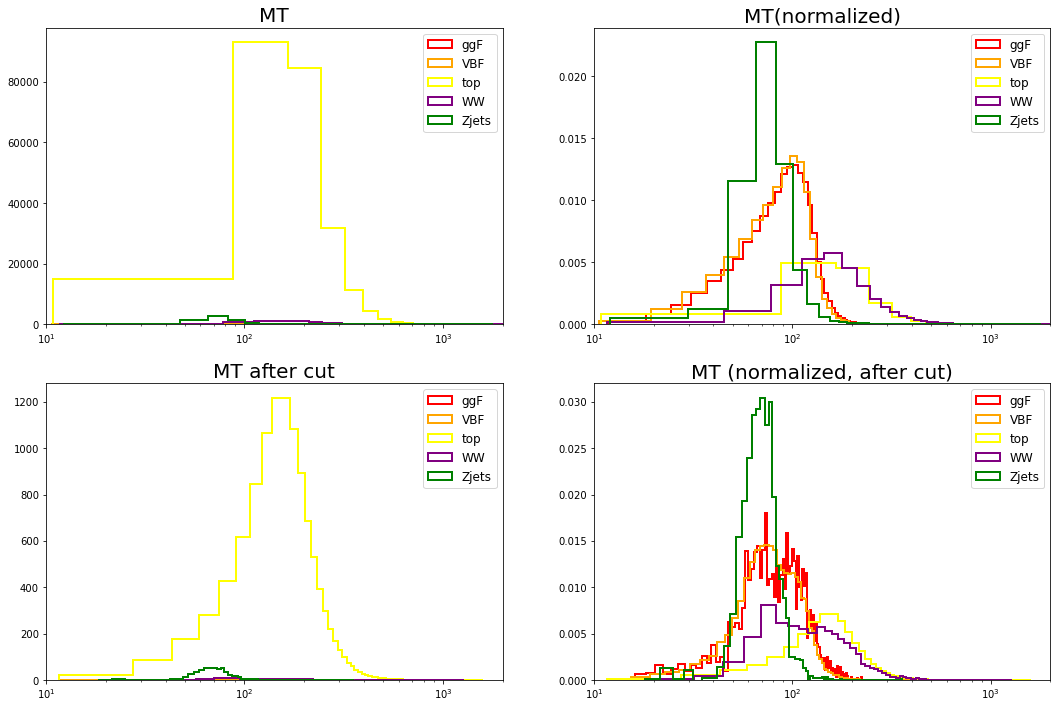

In [30]:
plotting_with_cut_log('MT', Data, CR_data, 100, 10, 2000)

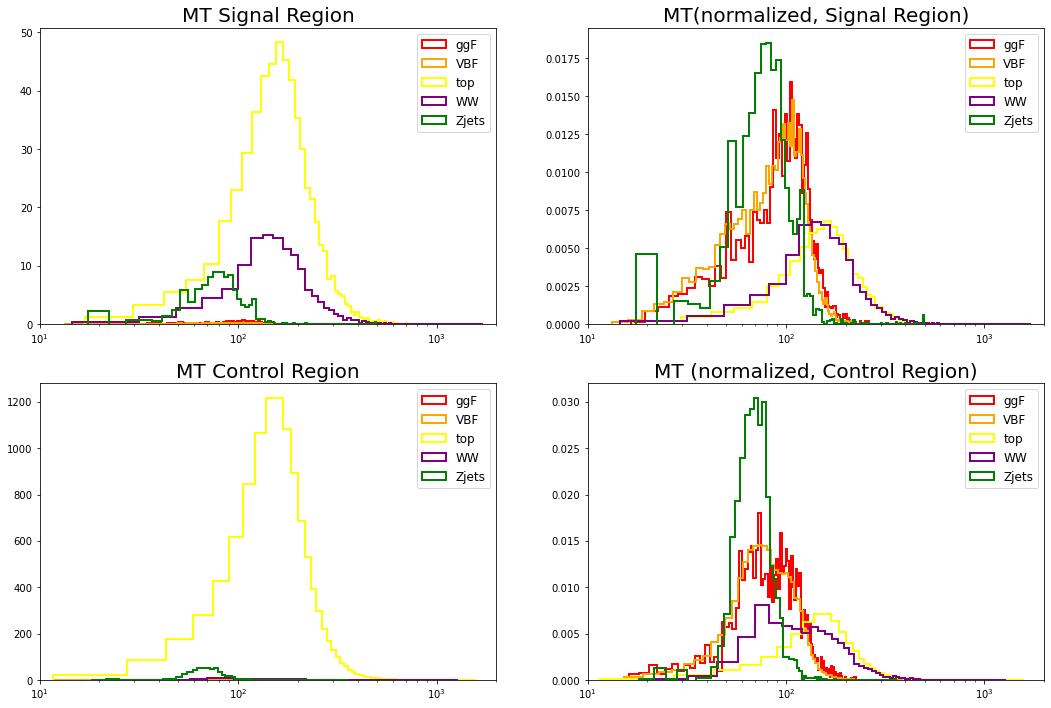

In [31]:
plotting_SR_CR('MT', SR_data, CR_data, 100, 10, 2000)

### 6. Check the orthogonality of the SR and CRs
i.e. Check an event does not exist in more than one region

In [32]:
Signal_ids=np.zeros(len(Data['weight']))
Control_ids=np.zeros(len(Data['weight']))
for i in SR_data.index:
    Signal_ids[i]=1
for i in CR_data.index:
    Control_ids[i]=1

print(len(SR_data.index), np.sum(Signal_ids))
print(len(CR_data.index), np.sum(Control_ids))
print(Signal_ids@Control_ids.T)

37855 37855.0
318039 318039.0
0.0


In [96]:
max(Signal_ids)

1.0

### 7. Think about it: what are the meaning of SR and CRs?